# Analyzing the UK Road Casualties between 2005 and 2015

## 1.Importing the proper libraries to work

In [1]:
# Because we are going to work with csv files as data we importing the pandas library


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Use this line to plot our graphs on Jupyter notebook
%matplotlib inline


#We also going to visualize our data for that assignment so we need to import a proper library for that, which in this case
# is Basemap

from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize
import matplotlib
from matplotlib.patches import PathPatch

# This command is for changing the style of the ploting layout for matplotlib

matplotlib.style.use('ggplot')




## 2. Importing the files and transforming our data

In [2]:
# Here we are importing as df1 the 'Road-Accident-Safety-Data-Guide.csv' and the Accidents0515

df1 = pd.read_csv('Road-Accident-Safety-Data-Guide.csv')

# With that command we are importing only the columns we desire for our purpose and not all of them
# Also we are using the command parse_dates so we can be able to transform the 'Date' column into a datetime64 so we can use
# further for our research

df = pd.read_csv('Accidents0515.csv',
                 usecols = [
                            'Longitude','Latitude','Local_Authority_(District)','Accident_Severity',
                            'Number_of_Casualties','Date','Day_of_Week'],
                             parse_dates = ['Date'])

# Here I change the name of a column to make it smaller for easier use
df = df.rename(columns = {'Local_Authority_(District)':'Local'})
# Although there are not any Nan values in the lists that we are going to use we just to be sure we are changing the values
# so we could be able to work with the data
df.dropna(inplace=True)

In [3]:
df.dtypes # Here we can see what kind of variables contain each column
           # We can see that time now is not a string and we can use it properly as a parameter

Longitude                      float64
Latitude                       float64
Accident_Severity                int64
Number_of_Casualties             int64
Date                    datetime64[ns]
Day_of_Week                      int64
Local                            int64
dtype: object

In [4]:
# With this command we are only keeping the values of the fatal accidents and not the injuries


df = df[df.Accident_Severity ==1]

In [5]:
# Here we can see the other imported list which contains the codes which are refering to each county
df1

code                   label
0       1             Westminster
1       2                  Camden
2       3               Islington
3       4                 Hackney
4       5           Tower Hamlets
5       6               Greenwich
6       7                Lewisham
7       8               Southwark
8       9                 Lambeth
9      10              Wandsworth
10     11  Hammersmith and Fulham
11     12  Kensington and Chelsea
12     13          Waltham Forest
13     14               Redbridge
14     15                Havering
15     16    Barking and Dagenham
16     17                  Newham
17     18                  Bexley
18     19                 Bromley
19     20                 Croydon
20     21                  Sutton
21     22                  Merton
22     23    Kingston upon Thames
23     24    Richmond upon Thames
24     25                Hounslow
25     26              Hillingdon
26     27                  Ealing
27     28                   Brent
28     29                  Harrow
29     30                  Barnet
..    ...                     ...
386   912                   Angus
387   913         Argyll and Bute
388   914        Scottish Borders
389   915        Clackmannanshire
390   916     West Dunbartonshire
391   917   Dumfries and Galloway
392   918             Dundee City
393   919           East Ayrshire
394   920     East Dunbartonshire
395   921            East Lothian
396   922       East Renfrewshire
397   923      Edinburgh, City of
398   924                 Falkirk
399   925                    Fife
400   926            Glasgow City
401   927                Highland
402   928              Inverclyde
403   929              Midlothian
404   930                   Moray
405   931          North Ayrshire
406   932       North Lanarkshire
407   933          Orkney Islands
408   934       Perth and Kinross
409   935            Renfrewshire
410   936        Shetland Islands
411   937          South Ayrshire
412   938       South Lanarkshire
413   939                Stirling
414   940            West Lothian
415   941           Western Isles

[416 rows x 2 columns]

In [6]:
# With that command we are changing the list index to make it equal with the dates for easier use and to start spliting the data
# to dates.

df.index = df['Date']
# Here are all the lists containing the data for each year
df_2005 = df['2005']
df_2006 = df['2006']
df_2007 = df['2007']
df_2008 = df['2008']
df_2009 = df['2009']
df_2010 = df['2010']
df_2011 = df['2011']
df_2012 = df['2012']
df_2013 = df['2013']
df_2014 = df['2014']
df_2015 = df['2015']

df_2005.head()


Longitude   Latitude  Accident_Severity  Number_of_Casualties  \
Date                                                                        
2005-05-18  -0.097293  51.515757                  1                     2   
2005-09-11   0.098065  51.463682                  1                     1   
2005-06-01  -0.178613  51.525861                  1                     1   
2005-02-02  -0.172518  51.512457                  1                     1   
2005-01-29  -0.120088  51.511718                  1                     1   

                 Date  Day_of_Week  Local  
Date                                       
2005-05-18 2005-05-18            4    570  
2005-09-11 2005-09-11            4     18  
2005-06-01 2005-06-01            5      1  
2005-02-02 2005-02-02            4      1  
2005-01-29 2005-01-29            7      1

In [7]:
# here we are making some adjustments so we can change the the data from list df1 and df
# we are counting the values for each Local territory and then for every areas code we are using the propre name
# As for example ' 1 = Westminister, 2 = Campden, 3 = Islington and so on. So now we are able to see how many deaths occured 
# for each area those 10 years

a = df['Local'].value_counts()   
b = a.sort_index() 
df1['code'] = b.values
df1.rename(columns={'code': 'Deaths', 'label': 'Area'}, inplace=True)
df1

# So now we have a list that indicates the Deaths in each Area


Deaths                    Area
0        99             Westminster
1        53                  Camden
2        33               Islington
3        55                 Hackney
4        68           Tower Hamlets
5        65               Greenwich
6        47                Lewisham
7        65               Southwark
8        80                 Lambeth
9        48              Wandsworth
10       43  Hammersmith and Fulham
11       44  Kensington and Chelsea
12       30          Waltham Forest
13       52               Redbridge
14       63                Havering
15       46    Barking and Dagenham
16       42                  Newham
17       36                  Bexley
18       81                 Bromley
19       73                 Croydon
20       28                  Sutton
21       27                  Merton
22       24    Kingston upon Thames
23       20    Richmond upon Thames
24       73                Hounslow
25       70              Hillingdon
26       75                  Ealing
27       64                   Brent
28       26                  Harrow
29      111                  Barnet
..      ...                     ...
386      81                   Angus
387      89         Argyll and Bute
388      99        Scottish Borders
389      14        Clackmannanshire
390      28     West Dunbartonshire
391     111   Dumfries and Galloway
392      31             Dundee City
393      45           East Ayrshire
394      14     East Dunbartonshire
395      29            East Lothian
396      17       East Renfrewshire
397      90      Edinburgh, City of
398      42                 Falkirk
399     120                    Fife
400     153            Glasgow City
401     224                Highland
402      14              Inverclyde
403      28              Midlothian
404      45                   Moray
405      50          North Ayrshire
406      83       North Lanarkshire
407      12          Orkney Islands
408     134       Perth and Kinross
409      58            Renfrewshire
410      14        Shetland Islands
411      55          South Ayrshire
412     126       South Lanarkshire
413      67                Stirling
414      67            West Lothian
415      14           Western Isles

[416 rows x 2 columns]

### Horizontal bar plot

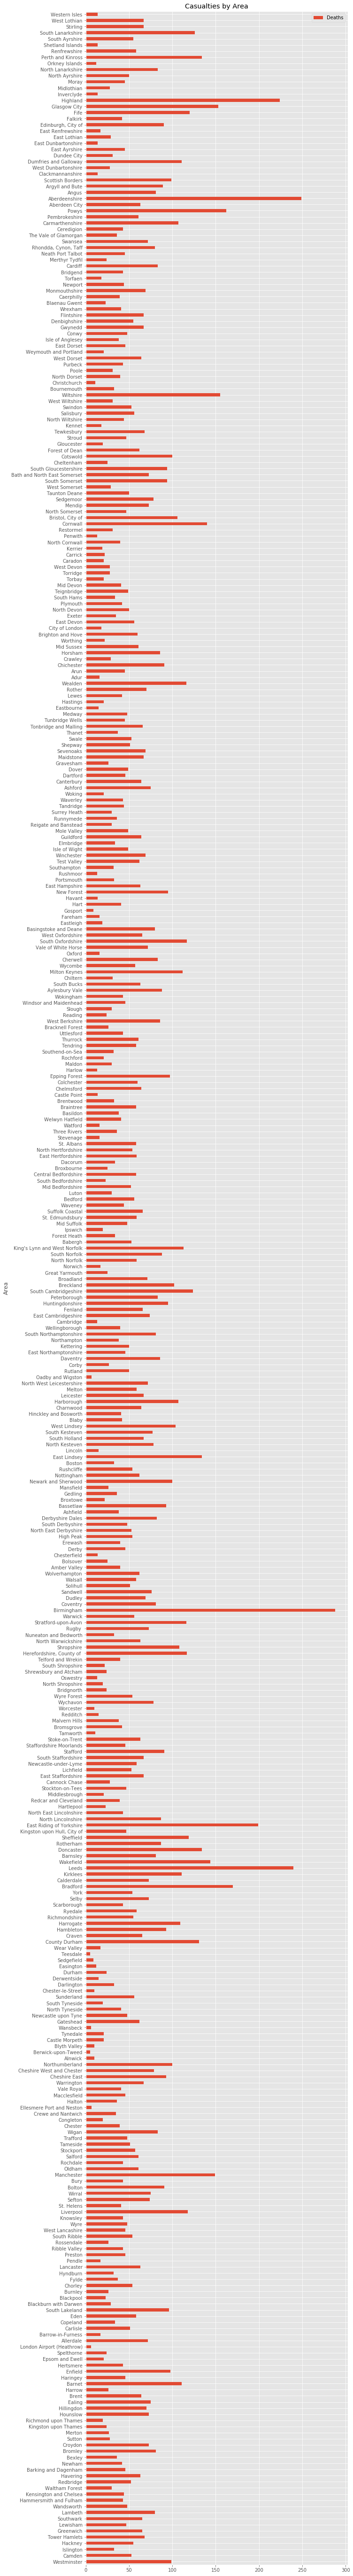

In [8]:
# Here we are using a sipmle horizontal bar diagram to get a better look at the Number of casualties during those 10 years
# This is important because we are going to use those data when we are going to have a better look at districts with the most 
# casualties


df1.index = df1['Area']
plt.figure()
df1.plot(title = 'Casualties by Area',kind='barh', figsize =(10,100))

##  3.Visual represenatation of the data

### Macroscale maps 

Text(0.5,1,'Casualties by Area')

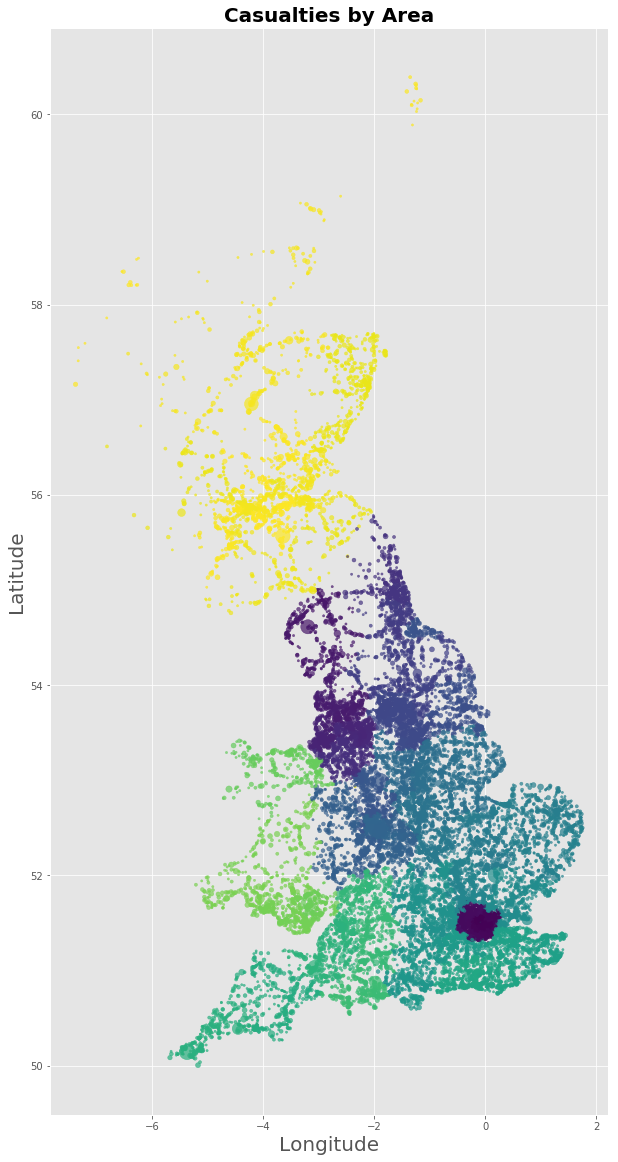

In [9]:
# Adjusting the subplots
fig, ax = plt.subplots(figsize =(10,20))
#the plot command, we are using Lon and Lat values for the x,y.
#The size changes depending on the number of casualties
#The color depends on the area that the accident happend
ax.scatter(df.Longitude, df.Latitude, s = df.Number_of_Casualties*20, marker= '.', c = df.Local, alpha = 0.7)
#Setting the x,y names
ax.set_xlabel('Longitude',size = 20)
ax.set_ylabel('Latitude',size = 20)
#Setting the title 
ax.set_title('Casualties by Area', fontsize=20, fontweight="bold")


# Another interesting graph is created if for colors, instead of using the Days of the week we are using Local
# which almost fills all the regions
# Sorry for not having the Legend properly. I couldn't figure it out. I will try my best to change it through the Christmas break



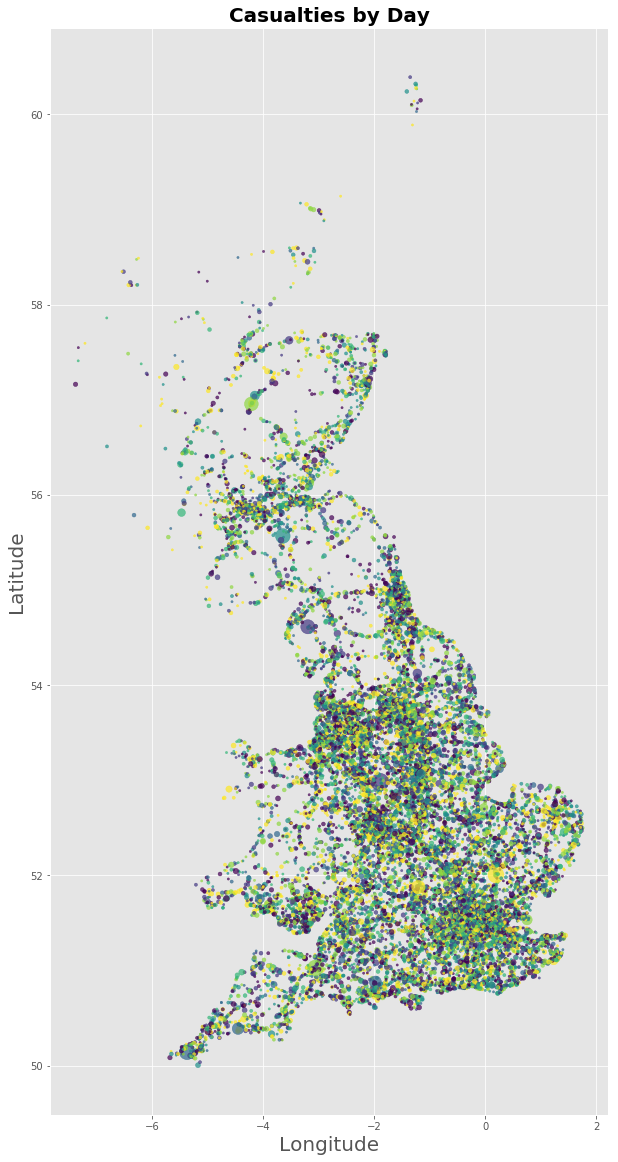

In [10]:
#Here we are having tha same plot but for the color, instead of using the Area we used the Day of the week that the accident happend


fig, ax = plt.subplots(figsize =(10,20))
ax.scatter(df.Longitude, df.Latitude, s = df.Number_of_Casualties*20, marker= '.', c = df.Day_of_Week, alpha = 0.7)
ax.set_xlabel('Longitude',size = 20)
ax.set_ylabel('Latitude',size = 20)
ax.set_title('Casualties by Day', fontsize=20, fontweight="bold")



plt.show()

#The interesting thing with this plots is that we just use  coordinates and we can see the Shape of the UK without any boundaries
# It is obvious from the plots that in Scotland either the data where not collected properly or people drive more carefully
# Closer to the big citys we can see that a lot of accidents take place,London,Manchester,Sheffield.
# We can also see from the graph 2 that accidents happen equally all days from a very far view

In [11]:
# Now to understand better when does the accidents happen during a year and have a more clear look on the map with less points
# Let's pick a year, the one with the most deaths, and analyze which months do the most accidents happen and which days

print(df_2005.Number_of_Casualties.count(),df_2006.Number_of_Casualties.count(),df_2007.Number_of_Casualties.count(),
     df_2008.Number_of_Casualties.count(),df_2009.Number_of_Casualties.count(),df_2010.Number_of_Casualties.count(),
     df_2011.Number_of_Casualties.count(),df_2012.Number_of_Casualties.count(),df_2013.Number_of_Casualties.count(),
     df_2014.Number_of_Casualties.count(),df_2015.Number_of_Casualties.count())

# We see that in 2006 we had the most fatal accidents so this year we are going to analyze


2913 2926 2714 2341 2057 1731 1797 1637 1608 1658 1616


In [12]:
# We are creating data for each month to examine the year 2006

df_2006_01 = df['2006-01']
df_2006_02 = df['2006-02']
df_2006_03 = df['2006-03']
df_2006_04 = df['2006-04']
df_2006_05 = df['2006-05']
df_2006_06 = df['2006-06']
df_2006_07 = df['2006-07']
df_2006_08 = df['2006-08']
df_2006_09 = df['2006-09']
df_2006_10 = df['2006-10']
df_2006_11 = df['2006-11']
df_2006_12 = df['2006-12']

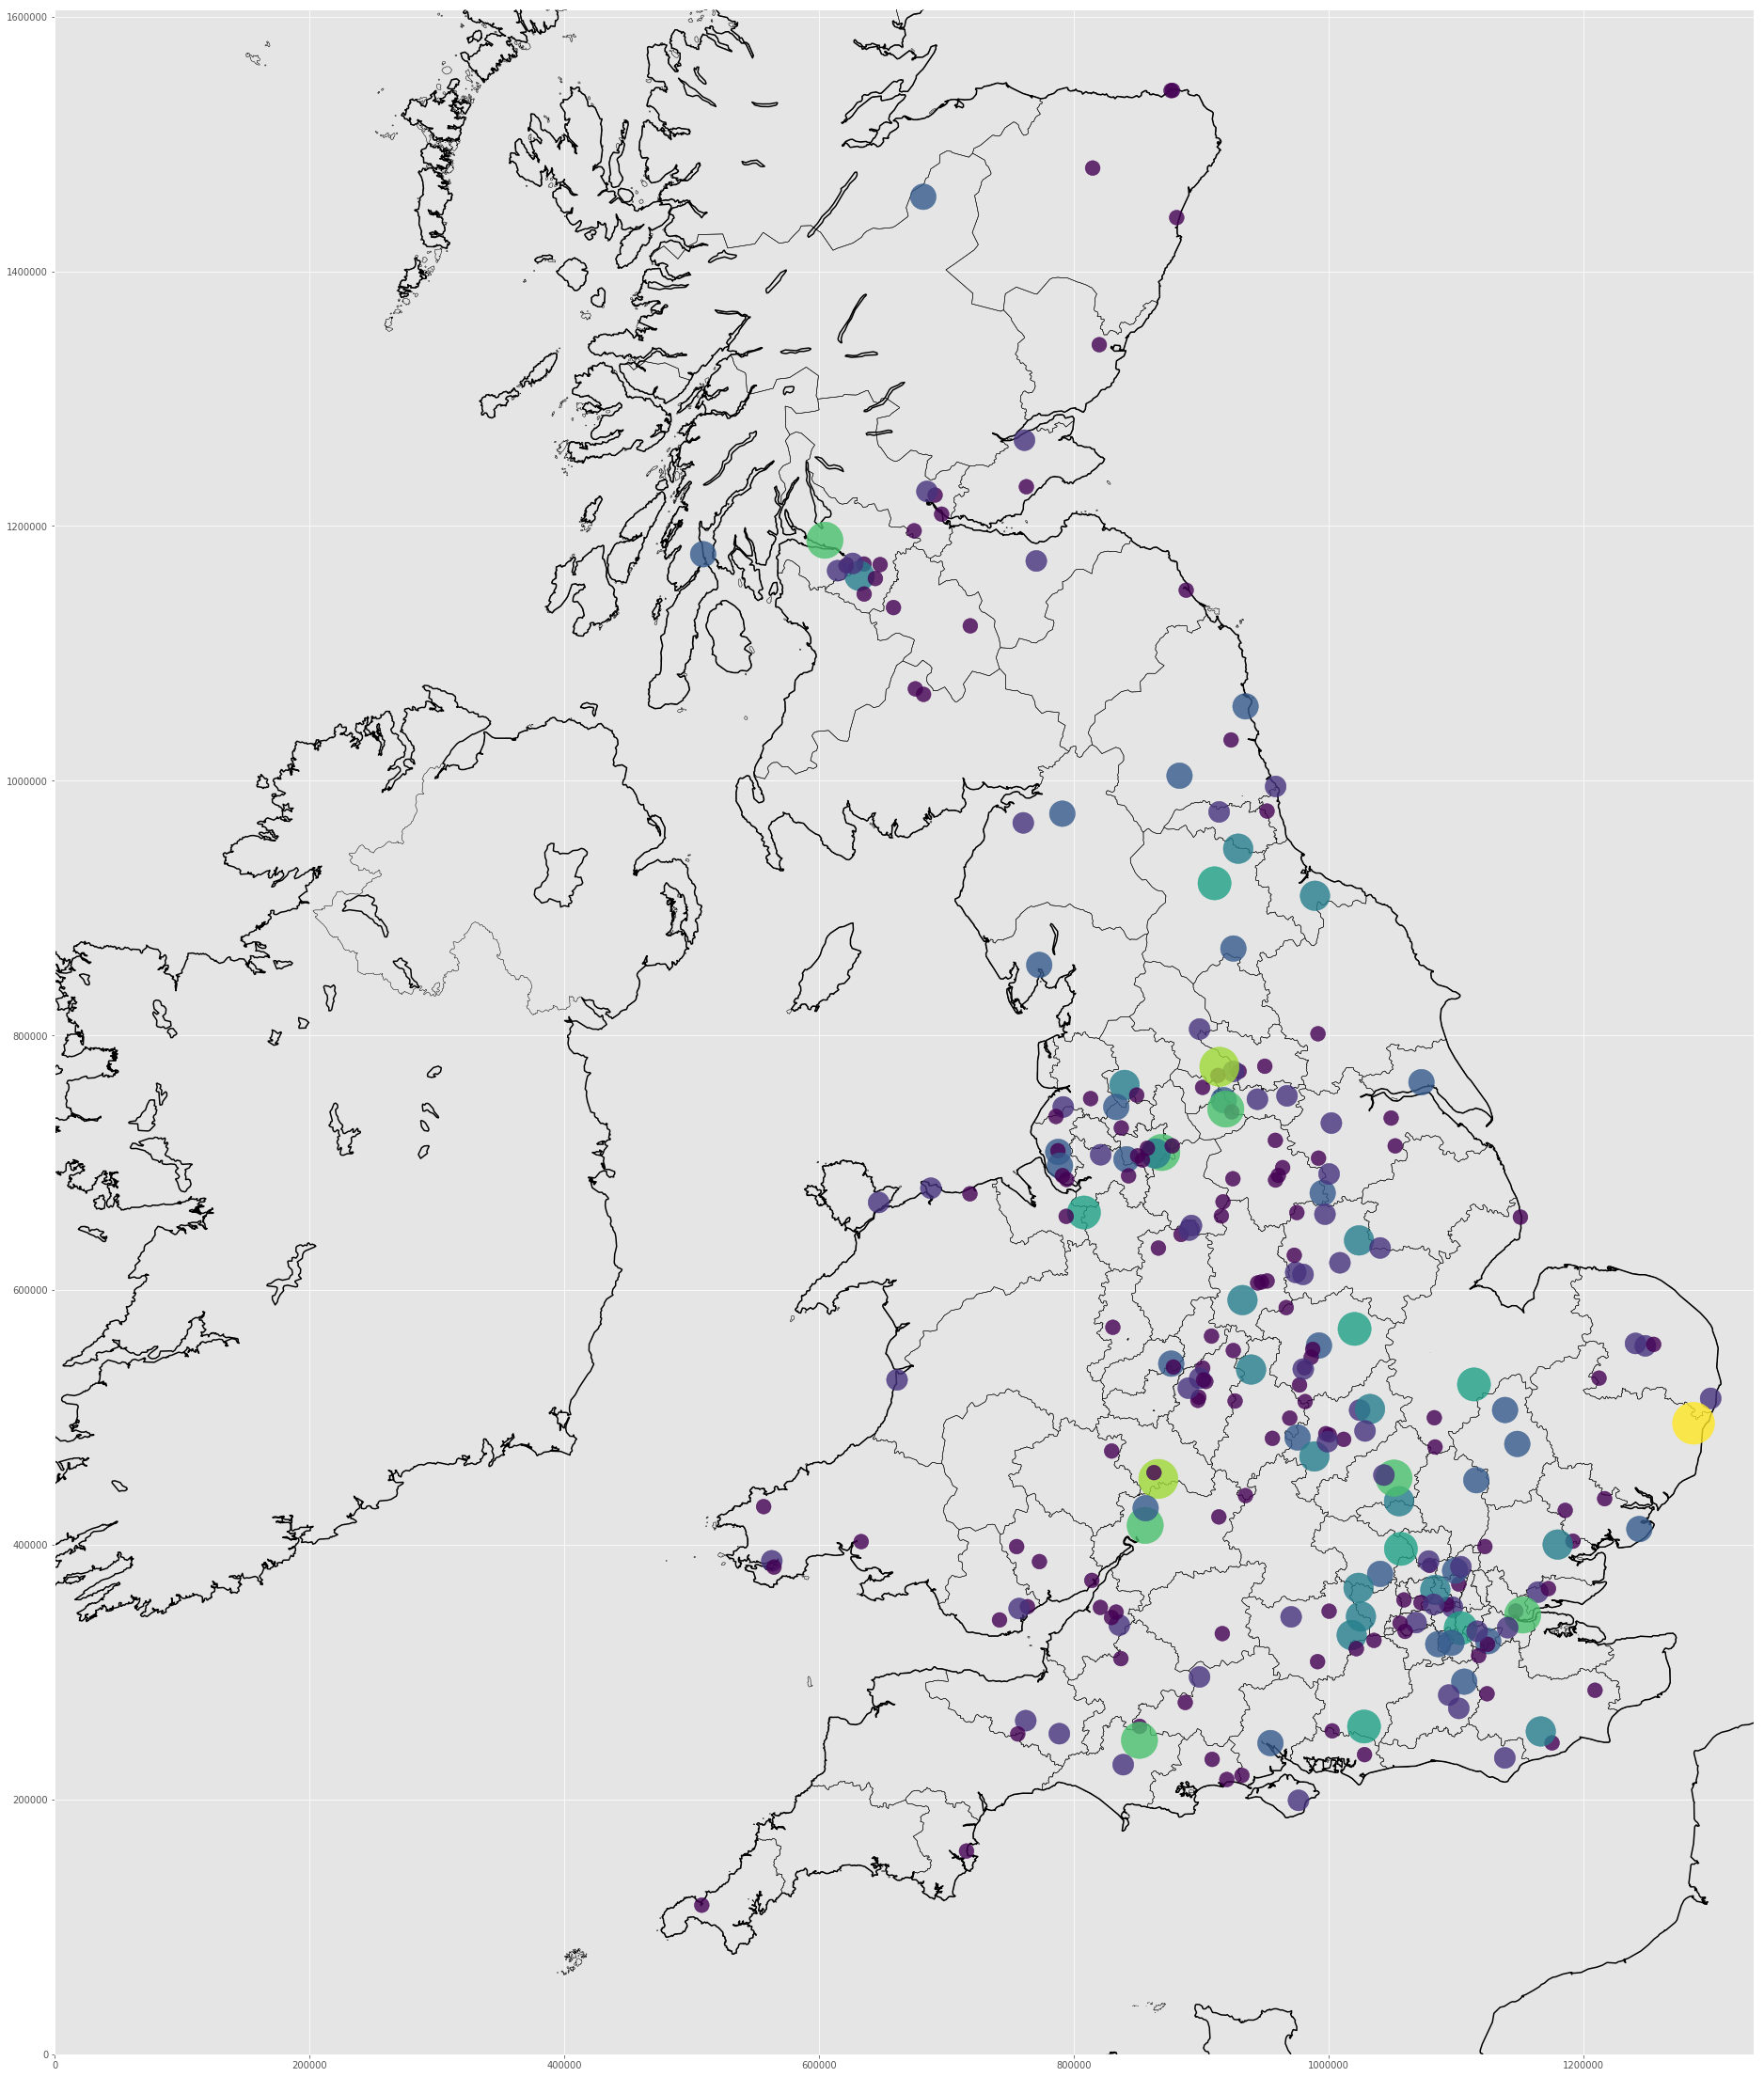

In [13]:
# Now we are going to use Basemap for our representations so we can have our map on the background so we could see the countys 
# clearer

# Setting the latitude and longitute parameters

lat,lon = df_2006_01.Latitude.tolist(), df_2006_01.Longitude.tolist()
#lat1,lon1 = df_2006_02.Latitude.tolist(), df_2006_02.Longitude.tolist()
#lat2,lon2 = df_2006_03.Latitude.tolist(), df_2006_03.Longitude.tolist()
#lat3,lon3 = df_2006_04.Latitude.tolist(), df_2006_04.Longitude.tolist()
#lat4,lon4 = df_2006_05.Latitude.tolist(), df_2006_05.Longitude.tolist()
#lat5,lon5 = df_2006_06.Latitude.tolist(), df_2006_06.Longitude.tolist()
#lat6,lon6 = df_2006_07.Latitude.tolist(), df_2006_07.Longitude.tolist()
#lat7,lon7 = df_2006_08.Latitude.tolist(), df_2006_08.Longitude.tolist()
#lat8,lon8 = df_2006_09.Latitude.tolist(), df_2006_09.Longitude.tolist()
#lat9,lon9 = df_2006_10.Latitude.tolist(), df_2006_10.Longitude.tolist()
#lat10,lon10 = df_2006_11.Latitude.tolist(), df_2006_11.Longitude.tolist()
#lat11,lon11 = df_2006_12.Latitude.tolist(), df_2006_12.Longitude.tolist()


# Plotting the map on the proper location
#Creating the map and its parameters

m = Basemap(resolution = 'h',
            projection = 'merc',
            lat_0 = 54.5, lon_0 = -4.36,
            llcrnrlon = -10., llcrnrlat = 49.5, urcrnrlon = 2., urcrnrlat = 58, suppress_ticks=False,)

#m.fillcontinents(color = 'white', lake_color = 'lightblue',zorder=1,)
#m.drawmapboundary(fill_color='lightblue',zorder = 0)
m.drawcoastlines(linewidth=1.5)
#m.drawcountries()
a = m.readshapefile('Areas','areas', zorder= 3)
#m.drawlsmask(resolution = 'h',lsmask = a)


# Assign lon and lat values to x,y
x,y = m(lon,lat)
#x1,y1 = m(lon1,lat1)
#x2,y2 = m(lon2,lat2)
#x3,y3 = m(lon3,lat3)
#x4,y4 = m(lon4,lat4)
#x5,y5 = m(lon5,lat5)
#x6,y6 = m(lon6,lat6)
#x7,y7 = m(lon7,lat7)
#x8,y8 = m(lon8,lat8)
#x9,y9 = m(lon9,lat9)
#x10,y10 = m(lon10,lat10)
#x11,y11 = m(lon11,lat11)



m.scatter(x, y, s = df_2006_01.Number_of_Casualties*1000, marker= '.', c = df_2006_01.Number_of_Casualties, alpha = 0.8,zorder= 3)
#m.scatter(x1, y1, s = df_2006_02.Number_of_Casualties*1000, marker= '.', c = df_2006_02.Number_of_Casualties, alpha = 0.8,zorder= 3)
#m.scatter(x2, y2, s = df_2006_03.Number_of_Casualties*1000, marker= '.', c = df_2006_03.Number_of_Casualties, alpha = 0.8,zorder= 3)
#m.scatter(x3, y3, s = df_2006_04.Number_of_Casualties*1000, marker= '.', c = df_2006_04.Number_of_Casualties, alpha = 0.8,zorder= 3)
#m.scatter(x4, y4, s = df_2006_05.Number_of_Casualties*1000, marker= '.', c = df_2006_05.Number_of_Casualties, alpha = 0.8,zorder= 3)
#m.scatter(x5, y5, s = df_2006_06.Number_of_Casualties*1000, marker= '.', c = df_2006_06.Number_of_Casualties, alpha = 0.8,zorder= 3)
#m.scatter(x6, y6, s = df_2006_07.Number_of_Casualties*1000, marker= '.', c = df_2006_07.Number_of_Casualties, alpha = 0.8,zorder= 3)
#m.scatter(x7, y7, s = df_2006_08.Number_of_Casualties*1000, marker= '.', c = df_2006_08.Number_of_Casualties, alpha = 0.8,zorder= 3)
#m.scatter(x8, y8, s = df_2006_09.Number_of_Casualties*1000, marker= '.', c = df_2006_09.Number_of_Casualties, alpha = 0.8,zorder=3)
#m.scatter(x9, y9, s = df_2006_10.Number_of_Casualties*1000, marker= '.', c = df_2006_10.Number_of_Casualties, alpha = 0.8,zorder= 3)
#m.scatter(x10, y10, s = df_2006_11.Number_of_Casualties*1000, marker= '.', c = df_2006_11.Number_of_Casualties, alpha = 0.8,zorder= 3)
#m.scatter(x11, y11, s = df_2006_12.Number_of_Casualties*1000, marker= '.', c = df_2006_12.Number_of_Casualties, alpha = 0.8,zorder= 3)

#Setting the size of the plot
plt.gcf().set_size_inches(40,40)

#plt.savefig('0',dpi = 150)


plt.show()

# This plot shows scatter points on the map. The points size and color depends on the Number of Casualties
# We can see from the first map that many accidents happen during January with more than 1 dead.

In [14]:
# For the next part we are using bokeh to create an interactive graph
# First we are importing the libraries

from bokeh.io import show, output_file   # For better view add next to show here the command 'output_file' to have it open in a seperate window
from bokeh.models import ColumnDataSource,HoverTool, LogColorMapper, Toggle, CustomJS
from bokeh.io import output_notebook
from bokeh.palettes import Viridis6 as palette
from bokeh.plotting import figure, show
from bokeh.layouts import layout





# We use that command to plot directly to jupyter
output_notebook()


Loading BokehJS ...

In [15]:
# This command is necessary to change the value of times again so the bokeh could recognise them
df_2006_01['Date'] = [x.strftime("%Y-%m-%d %H:%M:%S") for x in df_2006_01['Date']]

# We also changing the Date for the years 2005-07 because we are going to analyze them also in bokeh as they have the most 
# casualties than all the other years

df_2005['Date'] = [x.strftime("%Y-%m-%d %H:%M:%S") for x in df_2005['Date']]
df_2006['Date'] = [x.strftime("%Y-%m-%d %H:%M:%S") for x in df_2006['Date']]
df_2007['Date'] = [x.strftime("%Y-%m-%d %H:%M:%S") for x in df_2007['Date']]

C:\Users\Anastasis\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Anastasis\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Anastasis\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/st

In [16]:
df_2006_01.head()

Longitude   Latitude  Accident_Severity  Number_of_Casualties  \
Date                                                                        
2006-01-28  -0.130332  51.507925                  1                     2   
2006-01-04  -0.171070  51.519808                  1                     1   
2006-01-14  -0.251078  51.583527                  1                     4   
2006-01-22  -0.472678  51.539411                  1                     1   
2006-01-16  -0.352420  51.527262                  1                     1   

                           Date  Day_of_Week  Local  
Date                                                 
2006-01-28  2006-01-28 00:00:00            7      1  
2006-01-04  2006-01-04 00:00:00            7      1  
2006-01-14  2006-01-14 00:00:00            7     28  
2006-01-22  2006-01-22 00:00:00            1     26  
2006-01-16  2006-01-16 00:00:00            2     27

In [17]:
# Here is the graph that includes only the 1st month of 2006
# First we give latitude and longitude

longitude  = lon
latitude = lat

# Commands to adjust the colormap
palette.reverse()

color_mapper = LogColorMapper(palette=palette)

# For the source we input the values that we are going to use so we don't have to adjust them during the ploting
source = ColumnDataSource(data=dict(longitude=longitude, latitude=latitude,
                          a = df_2006_01.Number_of_Casualties,
                          Date = df_2006_01.Date))

# Here we are doing the same. We set the values here instead of later
Tools="hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select"

# The plotting command
p = figure(title = 'UK_Casualties_2006_01',plot_width=900, plot_height=1100,tools = Tools)

p.circle(x='longitude', y='latitude', legend = 'January', source=source, fill_alpha = 0.6,radius=df_2006_01.Number_of_Casualties*0.01,
        fill_color = 'orange',line_color = 'red')

p.legend


# The interaction with the mouse hovering and its setting

hover = p.select_one(HoverTool)
hover.point_policy = "follow_mouse"
hover.tooltips = [
    ("Date", "@Date"),
    ("Number_of_Casualties", "@a"),
    ("(Long, Lat)", "($x, $y)"),
]




show(p)


# This map shows us Points on the x,y axis according to lat,long and ths size of the Points depends again on the number 
# of Casualties. The graph is interactive, and when we hover over a point with a mouse we can see the Date o the accident
# the number of Casualties and the Longitude and Latitude based on bokeh

C:\Users\Anastasis\Anaconda3\lib\site-packages\bokeh\util\deprecation.py:34: BokehDeprecationWarning: 
Supplying a user-defined data source AND iterable values to glyph methods is deprecated.

See https://github.com/bokeh/bokeh/issues/2056 for more information.

  warn(message)


In [18]:
# Here is the graph contains the casualties of 2005,2006 and 2007, because they are they are the top 3 in our list,
# and with the help of buttons we are going to change our plot on bokeh
# First we give latitude and longitude

lat1, lon1 = df_2005.Latitude.tolist(), df_2005.Longitude.tolist()
lat2, lon2 = df_2006.Latitude.tolist(), df_2006.Longitude.tolist()
lat3, lon3 = df_2007.Latitude.tolist(), df_2007.Longitude.tolist()
longitude1, latitude1  = lon1, lat1
longitude2, latitude2  = lon2, lat2
longitude3, latitude3  = lon3, lat3


# Commands to adjust the colormap
palette.reverse()

color_mapper = LogColorMapper(palette=palette)

# For the source we input the values that we are going to use so we don't have to adjust them during the ploting
source = ColumnDataSource(data=dict(longitude=longitude1, latitude=latitude1,
                          a = df_2005.Number_of_Casualties,
                          Date = df_2005.Date))
source1 = ColumnDataSource(data=dict(longitude=longitude2, latitude=latitude2,
                          a = df_2006.Number_of_Casualties,
                          Date = df_2006.Date))
source2 = ColumnDataSource(data=dict(longitude=longitude3, latitude=latitude3,
                          a = df_2007.Number_of_Casualties,
                          Date = df_2007.Date))

# Here we are doing the same. We set the values here instead of later
Tools="hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select"

# The plotting command
p = figure(title = 'UK_Casualties_2005/2006/2007',plot_width=900, plot_height=1100,tools = Tools)

# Here we are setting the invisible factor to our values which we are going to have it at False
invisible_scatter0 = p.scatter(x='longitude', y='latitude', source=source, legend = '2005', fill_alpha = 0.6,radius=df_2005.Number_of_Casualties*0.01,
        fill_color = 'yellow',line_color = 'black')

invisible_scatter1 = p.scatter(x='longitude', y='latitude', source=source1, legend = '2006', fill_alpha = 0.6,radius=df_2006.Number_of_Casualties*0.01,
        fill_color = 'red',line_color = 'black')

invisible_scatter2 = p.scatter(x='longitude', y='latitude', source=source2, legend = '2007', fill_alpha = 0.6,radius=df_2007.Number_of_Casualties*0.01,
        fill_color = 'cyan',line_color = 'black')



invisible_scatter0.visible = False
invisible_scatter1.visible = False
invisible_scatter2.visible = False

# By using this small script from Java we will be able to have interaction to our plot withoun needing the bokeh server
code = '''\
object.visible = toggle.active
'''

# Here are the commands needed to create the buttons for changing the boolean from False to True
# One for every plot
callback0 = CustomJS.from_coffeescript(code=code, args={})
toggle0 = Toggle(label="2005", button_type="success", callback=callback0)
callback0.args = {'toggle': toggle0, 'object': invisible_scatter0}


callback1 = CustomJS.from_coffeescript(code=code, args={})
toggle1 = Toggle(label="2006", button_type="success", callback=callback1)
callback1.args = {'toggle': toggle1, 'object': invisible_scatter1}

callback2 = CustomJS.from_coffeescript(code=code, args={})
toggle2 = Toggle(label="2007", button_type="success", callback=callback2)
callback2.args = {'toggle': toggle2, 'object': invisible_scatter2}



# We are plotting the Legend on the top right by default
p.legend

# The interaction with the mouse hovering and its setting

hover = p.select_one(HoverTool)
hover.point_policy = "follow_mouse"
hover.tooltips = [
    ("Date", "@Date"),
    ("Number_of_Casualties", "@a"),
    ("(Long, Lat)", "($x, $y)"),
]

# Here I am using the output for a better view of the Plot but I also leave the jupyter plot

output_file("UK.html")

# This is the commands to show our plots
show(layout([p],[toggle0,toggle1, toggle2]))

# My reference for bokeh was the bokeh.pydata.org which helped me a lot as I could use the code from the site and also understand 
# the commands in the process. As you can see from the libraries I had to install a lot of new packages so I could have that effect


# As we can see from the graphs what stand out is a major accident in 25/9/2006 to the center of the UK when 
# we had 45 casualties,  while in 2007 there were 2 major accidents 
# with 68 and 42 casualties at first of March and 10th of November both close to the city of London. 

C:\Users\Anastasis\Anaconda3\lib\site-packages\bokeh\util\deprecation.py:34: BokehDeprecationWarning: 
Supplying a user-defined data source AND iterable values to glyph methods is deprecated.

See https://github.com/bokeh/bokeh/issues/2056 for more information.

  warn(message)
C:\Users\Anastasis\Anaconda3\lib\site-packages\bokeh\util\deprecation.py:34: BokehDeprecationWarning: 
Supplying a user-defined data source AND iterable values to glyph methods is deprecated.

See https://github.com/bokeh/bokeh/issues/2056 for more information.

  warn(message)
C:\Users\Anastasis\Anaconda3\lib\site-packages\bokeh\util\deprecation.py:34: BokehDeprecationWarning: 
Supplying a user-defined data source AND iterable values to glyph methods is deprecated.

See https://github.com/bokeh/bokeh/issues/2056 for more information.

  warn(message)


### Microscale mapping and analyzing

In [19]:
# Now that we had a good look from the accidents above it is time to pick some places and do a zoom to analyze the accidents
# precicely
# First lets find out which Districts have the most casualties through this 10 years

Sorted_list = df1.sort_values('Deaths',ascending= False)
Sorted_list.head()

Deaths                      Area
Area                                                      
Birmingham                   288                Birmingham
Aberdeenshire                249             Aberdeenshire
Leeds                        240                     Leeds
Highland                     224                  Highland
East Riding of Yorkshire     199  East Riding of Yorkshire

In [20]:
# We can see here that Birmingham probably has the most Dangerous roads, followed by Aberdeenshire and Leeds. But let's have 
# a look closer to see in details where the accidents had happend.
# First let's see from our other list the code of those 3 Districts
# Because I changed my original file I will import the original file with the codes again

x = pd.read_csv('Road-Accident-Safety-Data-Guide.csv')
x.head()
a = x[x['label'] == 'Birmingham']
b = x[x['label'] == 'Aberdeenshire'] 
c = x[x['label'] == 'Leeds'] 
a , b, c


(     code       label
 155   300  Birmingham,      code          label
 385   911  Aberdeenshire,      code  label
 113   204  Leeds)

In [21]:
# So the codes are 300 for Birmingham, 911 for Aberdeenshire and 204 for Leeds, so lets find the coordinates from the df list

Birm = df[df['Local'] == 300]
Aber = df[df['Local'] == 911]
Leed = df[df['Local'] == 204]

# Now that we have the list with the coordinates for each district let's plot them to see in which roads the most accidents have
# happend. Let's use folium to have a better look at details in a map.

import folium


In [22]:
#Here is the map over Birmingham. We can see all the accidents happend from 2005 to 2015.The map zooms in and out and we can
# have a clear picture of where the accidents took place. Also if we click on the circles there is a popup with the date of the
# accident


# Here we are creating the map by giving as a starting point the Lat and Long means
m = folium.Map(location= [Birm['Latitude'].mean(),Birm['Longitude'].mean()],zoom_start = 10)
# Here we call a def(because we cannot add markers using a list) that will hepl us map the accidents
def add_marker(row):
    marker = folium.CircleMarker([row['Latitude'], row['Longitude']], fill = True , fill_color = 'yellow', fill_opacity = 0.8,
                                 radius = row['Number_of_Casualties'], color = 'black',
                                     popup = row.name.strftime('%D'))
    marker.add_to(m)
    
# Calling the function for the column   
Birm.apply(add_marker, axis =1) 
m

In [23]:
# Here we are doing the same thing for the other 2 districts

m = folium.Map(location= [Aber['Latitude'].mean(),Aber['Longitude'].mean()],zoom_start = 9)

# Here we call a def(because we cannot add markers using a list) that will hepl us map the accidents
def add_marker(row):
    marker = folium.CircleMarker([row['Latitude'], row['Longitude']], fill = True , fill_color = 'red', fill_opacity = 0.8,
                                 radius = row['Number_of_Casualties'], color = 'black',
                                     popup = row.name.strftime('%D'))
    marker.add_to(m)
    
# Calling the function for the column   
Aber.apply(add_marker, axis =1) 
m

In [24]:
# Here we are doing the same thing for the other 2 districts

m = folium.Map(location= [Leed['Latitude'].mean(),Leed['Longitude'].mean()],zoom_start = 11)

# Here we call a def(because we cannot add markers using a list) that will hepl us map the accidents
def add_marker(row):
    marker = folium.CircleMarker([row['Latitude'], row['Longitude']], fill = True , fill_color = 'blue', fill_opacity = 0.8,
                                 radius = row['Number_of_Casualties'], color = 'black',
                                     popup = row.name.strftime('%D'))
    marker.add_to(m)
    
# Calling the function for the column   
Leed.apply(add_marker, axis =1) 
m
                                 